### Linear Modeling Lab

This lab will walk us through some of the basics of building and interpreting linear models.  

It's designed with the following goals in mind:

 - Get more acclimated to the SKlearn api
 - Understanding the mechanics of linear models and how they build predictions
 - Properly interpreting and improving our results

### Step 1).  Load in the `housing.csv` file

In [2]:
# your code here

import pandas as pd
import numpy as np



raw=pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

### Step 2).  Import and initialize the `LinearRegression` algorithm from `SKlearn`

In [3]:
# your code here
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [4]:
raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 3).  Fit an instance of the `LinearRegression` algorithm using *at least* 1 variable, but with more if you choose.

In [7]:
# your code here
# regress on number of rooms, crime rate, student - teach ratio

X = raw[['RM', 'CRIM', 'PTRATIO']]
y = raw['PRICE']

In [8]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 4).  Verify your coefficients and intercept term, and make a column for your predictions

In [10]:
# your code here
lreg.coef_

array([ 7.3804111 , -0.20496083, -1.0695461 ])

In [11]:
lreg.intercept_

-3.370704335154219

In [ ]:
# y = 7.38RM - 0.20CRIM - 1.06PTRATIO - 3.37

### Step 5).  Score your model

In [12]:
# your code here
lreg.score(X,y)

0.5943412940723471

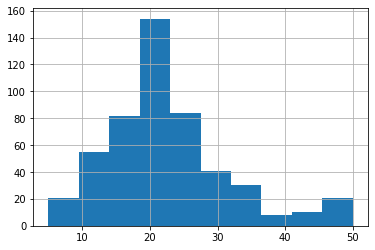

In [13]:
%matplotlib inline
y.hist()

### Step 6). Adding Additional Terms

You have a fairly simple regression model right now, but there's lots of reasons to think that you can improve it. For now, try and identify at least 1 good variable to add to `X`.  

This should be a  variable that you expect will have a large impact on the value of `y`, that's independent of everything else.

**Hint:** the `pairplot` and `heatmap` from `Seaborn` are very helpful here.

**Also:** Are there any other terms that, when compared to the others, look like they might have the same effect?

Try a few different versions of `X`, and use your r-squared value to determine whether or not you've made an improvement.

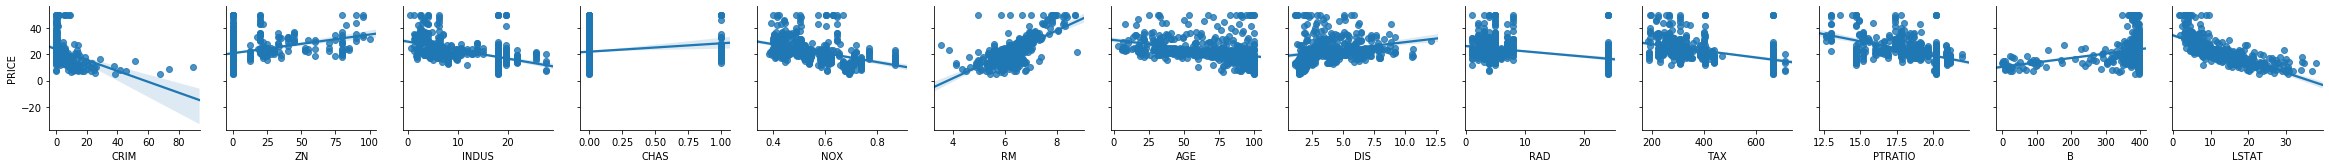

In [50]:
# your code here
import seaborn as sns

sns.pairplot(raw, x_vars=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], y_vars=['PRICE'], kind='reg');

In [18]:
X_2 = raw[['RM', 'LSTAT', 'INDUS']]
y_2 = raw['PRICE']

In [19]:
lreg.fit(X_2, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lreg.coef_

array([ 5.07379366, -0.60671351, -0.06363554])

In [21]:
lreg.intercept_

-0.9686524884038832

In [22]:
lreg.score(X_2,y_2)

0.6399917132069013

### Step 7a). Residuals

Create an `Error` column that's the difference between the predictions of your best model and the `PRICE` column.

In [35]:
# your code here
raw['PREDICTION'] = lreg.predict(X_2)

In [36]:
raw['ERROR'] = raw['PRICE']-raw['PREDICTION']
#residual of an observed value is the difference between the observed value and the estimated value of the quantity of interest 

In [37]:
raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION,ERROR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,29.223109,-5.223109
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.614912,-4.014912
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.591596,2.108404
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.615292,0.784708
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.921242,4.278758


### 7b).  What is the average value of the `Error` column?

In [38]:
# your code here
raw['ERROR'].mean()

-7.986584604022864e-15

### 7c).  What is its histogram?

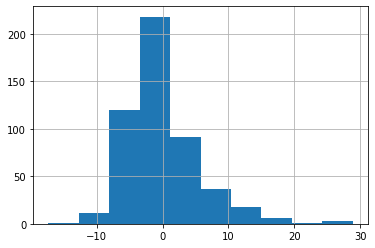

In [39]:
# your code here
raw['ERROR'].hist()

## Plotting

Make the following plots to verify your results:

### 8a).  Plot your `Prediction` column vs the `PRICE` column using `regplot` in `Seaborn`

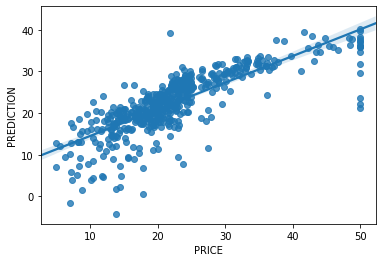

In [41]:
# your code here

sns.regplot(x='PRICE', y ='PREDICTION', data=raw);

### 8b).  Plot your `Residual` column vs your `Prediction` column

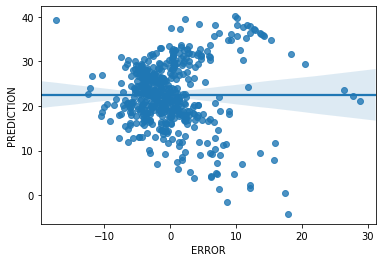

In [42]:
# your code here
sns.regplot(x='ERROR', y ='PREDICTION', data=raw);

### 8c).  Plot your `Residual` column vs your `PRICE` column

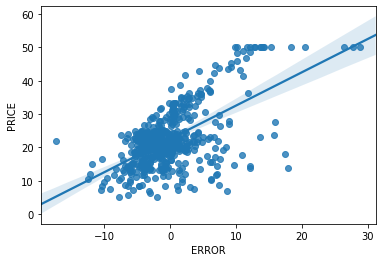

In [43]:
sns.regplot(x='ERROR', y ='PRICE', data=raw);